## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [2]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCis18850-KccDict2020.txt"
Output: "KCC Data/CkipNewsCis18850-KccDict2020-MalletNum20-HW.txt"

@author: CHING TING
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [3]:
fList = []
with open("KCC Data/CkipNewsCis18850-KccDict2020.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['馬英九', '昨天', '上午', '視察', '衛武營藝術文化中心', '文化部', '洪孟啟', '工程', '副主委', '顏久榮', '高雄市', '副市長', '吳宏謀', '一同', '到場', '聽取', '衛武營', '興建', '工程', '簡報', '瞭解', '工程進度', '執行', '情形', '完成', '百分之九十五', '工程進度', '共計', '投入', '新臺幣', '一百零五億八千萬', '經費', '預計', '六月', '竣工', '明年', '開館', '營運', '目標', '馬英九', '指出', '衛武營', '案子', '九十四年', '編列', '預算', '核定', '施工', '正式', '完工', '時間', '長達', '十三', '原先', '預計', '故宮', '南院', '工程', '單位', '部門', '克服', '困難', '值得', '檢討', '總統', '致詞', '民國', '九十九年', '主持', '動土', '典禮', '原從', '黃土', '生長出', '有如', '魟魚', '悠遊', '海浪', '建築', '實在', '驚豔', '過程', '包含', '團隊', '付出', '努力', '籌建', '過程', '艱辛', '各界', '關注', '投入', '新建', '工程', '幾近', '完工', '特別', '肯定', '文化部', '籌建', '過程', '付出', '辛勞', '高雄市政府', '各界', '支持', '配合', '總統', '文化', '城市', '期許', '衛武營藝術文化中心', '臺灣', '藝術', '力量', '南方', '集結地', '臺北', '國家兩廳院', '臺中', '國家歌劇院', '攜手', '並進', '打造', '台灣', '國際', '藝文', '版圖', '地標', '文化部', '洪孟啟', '衛武營', '考驗', '面臨', '營運', '壓力', '文化部', '衛武營', '南部', '高雄市文化中心', '嘉義', '文化', '園區', '故宮', '南院', '台南', '地方', '藝文', '團體', '高雄大東文化藝術中心', '屏東', '演藝廳'

### creat dictionary for corpus

In [4]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(113533 unique tokens: ['一同', '一百零五億八千萬', '上午', '並進', '主持']...)
------------------------------


### creat corpus need for Topic Modeling

In [5]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 3), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 4), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 4), (70, 5), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [6]:
mallet_path = "C://mallet/bin/mallet"

ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("KCC Data/NewsCisTest-KccDict2020-MalletNum20-HW.txt", 'w', encoding='utf-8-sig')

In [7]:
#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('陳菊', 0.05235847190537101), ('議員', 0.041400181978821886), ('議會', 0.040134242348318014), ('市長', 0.04004852768583598), ('市府', 0.032373768675906266), ('市民', 0.026861656534754), ('高雄市', 0.024257249482415307), ('韓國瑜', 0.022496802183745862), ('高雄市議會', 0.018323157464428416), ('康裕成', 0.015784684767845135), ('高雄', 0.01516490182374428), ('團隊', 0.01364181820579431), ('質詢', 0.010575870663167751), ('許崑源', 0.009613229069138765), ('市政', 0.008854983977951552), ('議長', 0.007997837353131223), ('陳美雅', 0.0075692640407210585), ('監督', 0.0067516780293539755), ('首長', 0.006731897722627353), ('提出', 0.00565716772381417)]

strTM =  1[('市長', 0.054842038328123156), ('局長', 0.04575310230859737), ('議員', 0.030274876535923572), ('裡面', 0.020249250838641875), ('真的', 0.017976064913356203), ('本席', 0.01770952720017363), ('市政府', 0.0163501848629425), ('答覆', 0.015394456777102127), ('辦法', 0.014994650207328264), ('回答', 0.014488228552281372), ('地方', 0.013703846139201224), ('剛剛', 0.011940889550579339), ('時間', 0.011796197


 Coherence Score:  0.5965951846130426


### Finding the optimal number of topics

In [9]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [10]:
lim=36; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.4663979632163386
Num_topics:  6  Coherence Score=  0.5182210601453113
Num_topics:  9  Coherence Score=  0.5235812271706114
Num_topics:  12  Coherence Score=  0.5572828614498864
Num_topics:  15  Coherence Score=  0.5736350733704826
Num_topics:  18  Coherence Score=  0.5828794396369154
Num_topics:  21  Coherence Score=  0.5829834380243023
Num_topics:  24  Coherence Score=  0.599180572398025
Num_topics:  27  Coherence Score=  0.6161815672702344
Num_topics:  30  Coherence Score=  0.6075499825174203
Num_topics:  33  Coherence Score=  0.6080343735380968


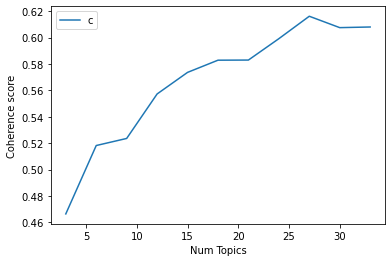

In [11]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.4664
Num Topics = 6  has Coherence Value of 0.5182
Num Topics = 9  has Coherence Value of 0.5236
Num Topics = 12  has Coherence Value of 0.5573
Num Topics = 15  has Coherence Value of 0.5736
Num Topics = 18  has Coherence Value of 0.5829
Num Topics = 21  has Coherence Value of 0.583
Num Topics = 24  has Coherence Value of 0.5992
Num Topics = 27  has Coherence Value of 0.6162
Num Topics = 30  has Coherence Value of 0.6075
Num Topics = 33  has Coherence Value of 0.608
Optimal Topic Num = 27  Highest Value = 0.6161815672702344


###  Select the model and print the topics

In [13]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.021*"工程" + 0.014*"水利局" + 0.012*"原住民" + 0.011*"經費" + 0.011*"道路" + '
  '0.009*"區公所" + 0.009*"排水" + 0.009*"地區" + 0.008*"完成" + 0.008*"單位" + '
  '0.008*"地方" + 0.008*"改善" + 0.008*"淹水" + 0.007*"旗山" + 0.007*"協助" + 0.007*"美濃" '
  '+ 0.007*"目前" + 0.006*"計畫" + 0.006*"原民會" + 0.006*"市府" + 0.006*"重建" + '
  '0.006*"滯洪池" + 0.005*"會勘" + 0.005*"相關" + 0.005*"施工"'),
 (1,
  '0.032*"陳菊" + 0.028*"台灣" + 0.020*"總統" + 0.016*"民主進步黨" + 0.016*"蔡英文" + '
  '0.013*"政治" + 0.013*"市長" + 0.011*"高雄市" + 0.010*"執政" + 0.010*"支持" + '
  '0.010*"政府" + 0.009*"陳水扁" + 0.008*"立法院" + 0.008*"高雄" + 0.006*"國家" + '
  '0.006*"民主" + 0.006*"馬英九" + 0.006*"行政院" + 0.006*"中央" + 0.005*"出席" + '
  '0.005*"媒體" + 0.005*"昨天" + 0.005*"賴清德" + 0.004*"代表" + 0.004*"中國"'),
 (2,
  '0.025*"高雄市政府環境保護局" + 0.017*"公司" + 0.015*"業者" + 0.015*"污染" + 0.015*"管線" + '
  '0.011*"高雄市" + 0.010*"廠商" + 0.010*"管理" + 0.009*"環境" + 0.008*"工廠" + '
  '0.008*"垃圾" + 0.008*"環保" + 0.008*"目前" + 0.007*"中國石油" + 0.007*"改善" + '
  '0.006*"相關" + 0.006*"發生" + 0.005*"標準" + 0.005*"陳金

### Finding the dominant topic in each sentence

In [14]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15.0,0.2187,"規劃, 地方, 公園, 空間, 鳳山, 發展, 中心, 文化, 建設, 社區","[馬英九, 昨天, 上午, 視察, 衛武營藝術文化中心, 文化部, 洪孟啟, 工程, 副主委..."
1,1,6.0,0.2034,"高雄, 產業, 城市, 高雄市, 台灣, 發展, 經濟, 國際, 日本, 機會","[日本, 九州熊本, 接連, 強震, 襲擊, 台灣, 捐贈, 熊本, 縣政府, 日本, 政府..."
2,2,10.0,0.2236,"登革熱, 服務, 照顧, 高雄市, 社會局, 工作, 社會, 疫情, 老人, 衛生局","[壽山動物園, 增進, 動物飼養, 福祉, 保育, 工作, 設立, 高雄市壽山動物園動物認養..."
3,3,9.0,0.1810,"指出, 高市, 昨天, 市府, 去年, 高市府, 員工, 台南, 勞工, 台中","[日本, 熊本地震, 災情, 慘重, 高雄市, 陳菊, 昨天, 率先, 捐出, 一月, 所得..."
4,4,6.0,0.3853,"高雄, 產業, 城市, 高雄市, 台灣, 發展, 經濟, 國際, 日本, 機會","[睽違, 超過, 世紀, 緬甸, 官方, 代表, 包含, 緬甸, 聯邦, 議會, 議員, 美..."
5,5,6.0,0.3434,"高雄, 產業, 城市, 高雄市, 台灣, 發展, 經濟, 國際, 日本, 機會","[高雄, 翻轉, 政府, 力挺, 高雄市, 陳菊, 日前, 高雄市議會, 施政報告, 指出,..."
6,6,6.0,0.6019,"高雄, 產業, 城市, 高雄市, 台灣, 發展, 經濟, 國際, 日本, 機會","[高雄市, 陳菊, 前往, 東台, 精機, 參訪, 高雄, 鼓勵, 傳統, 產業, 升級, ..."
7,7,8.0,0.3203,"交通, 交通局, 捷運, 高雄輕軌, 民眾, 公車, 機車, 規劃, 運輸, 路線","[交通局, 委託, 民間, 公司, 民調, 昨天, 公布, 民調, 搭乘, 公車, 民眾, ..."
8,8,3.0,0.3991,"活動, 觀光, 高雄, 舉辦, 民眾, 觀光局, 文化, 旅遊, 遊客, 吸引","[臺灣塑膠工業股份有限公司, 企業, 回饋, 地方, 藝文, 活動, 週六, 晚間, 高雄市..."
9,9,16.0,0.2378,"立委, 民主進步黨, 中國國民黨, 選區, 議員, 選舉, 參選, 候選人, 支持, 競選","[中國國民黨, 分區, 立委, 陳宜民, 鳳山, 地區, 成立, 聯合, 服務處, 日前, ..."


### Find the most representative document for each topic

In [15]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.5651,"陳菊, 議員, 議會, 市長, 市府, 市民, 高雄市, 韓國瑜, 高雄市議會, 康裕成","[面對, 市政府, 高雄市議會, 審議, 墊付款, 高雄市議會, 許崑源, 重砲, 回擊, ..."
1,1.0,0.4801,"市長, 局長, 議員, 裡面, 真的, 本席, 市政府, 答覆, 辦法, 回答","[好了, 高雄市, 副市長, 陳啟昱, 仁武, 服務處, 有沒有, 看錯, 看錯, 副市長,..."
2,2.0,0.6409,"高雄市, 中央, 預算, 補助, 市府, 政府, 建設, 經費, 人口, 編列","[蔡昌達, 開會, 康裕成, 質詢, 康裕成, 報告, 議長, 高雄人, 議員, 意見, 一..."
3,3.0,0.6961,"活動, 觀光, 高雄, 舉辦, 民眾, 觀光局, 文化, 旅遊, 遊客, 吸引","[高雄, 人情味, 城市, 台式, 料理, 品嚐, 人情味, 最佳, 方式, 提供, 道地,..."
4,4.0,0.6458,"地區, 水利局, 農業局, 農民, 排水, 淹水, 美濃, 旗山, 農業, 滯洪池","[市政府, 水利局, 旗山區, 第五, 排水, 系統, 華中街, 增設, 分流, 箱涵, 應..."
5,5.0,0.6305,"中國石油, 居民, 市府, 管線, 林園, 公司, 工業區, 氣爆, 地方, 石化","[中國石油, 公司, 原本, 昨天, 後勁, 居民, 提出, 高雄, 煉油, 總廠, 遷移,..."
6,6.0,0.6775,"高雄, 產業, 城市, 高雄市, 台灣, 發展, 經濟, 國際, 日本, 機會","[高雄市政府經濟發展局, 昨天, 下午, 日本, 東京, 局長, 曾文生, 日本, ｔｓｉ,..."
7,7.0,0.6487,"發生, 民眾, 人員, 高雄市政府警察局, 警方, 警察, 電話, 發現, 現場, 員警","[昨天, 凌晨, 四點, 四十二分, 高雄, 七十三, 林姓, 老翁, 晨運, 途中, 中華..."
8,8.0,0.6318,"交通, 交通局, 捷運, 高雄輕軌, 民眾, 公車, 機車, 規劃, 運輸, 路線","[國道, 一號, 鼎金, 系統, 交流道, 鼎力路, 南下, 出口, 匝道, 六月, 十七日..."
9,9.0,0.5506,"指出, 高市, 昨天, 市府, 去年, 高市府, 員工, 台南, 勞工, 台中","[正義股份有限公司, 仁武, 業務, 緊縮, 六月, 十五日, 資遣, 十九, 員工, 公司..."


###  Showing topic distribution across documents

In [16]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,15.0,"規劃, 地方, 公園, 空間, 鳳山, 發展, 中心, 文化, 建設, 社區",750.0,0.0398
1.0,6.0,"高雄, 產業, 城市, 高雄市, 台灣, 發展, 經濟, 國際, 日本, 機會",1337.0,0.0709
2.0,10.0,"登革熱, 服務, 照顧, 高雄市, 社會局, 工作, 社會, 疫情, 老人, 衛生局",745.0,0.0395
3.0,9.0,"指出, 高市, 昨天, 市府, 去年, 高市府, 員工, 台南, 勞工, 台中",1052.0,0.0558
4.0,6.0,"高雄, 產業, 城市, 高雄市, 台灣, 發展, 經濟, 國際, 日本, 機會",914.0,0.0485
...,...,...,...,...
18845.0,1.0,"市長, 局長, 議員, 裡面, 真的, 本席, 市政府, 答覆, 辦法, 回答",NaN,NaN
18846.0,17.0,"學校, 學生, 教育局, 教育, 運動, 孩子, 老師, 家長, 高雄市, 校長",NaN,NaN
18847.0,1.0,"市長, 局長, 議員, 裡面, 真的, 本席, 市政府, 答覆, 辦法, 回答",NaN,NaN
18848.0,1.0,"市長, 局長, 議員, 裡面, 真的, 本席, 市政府, 答覆, 辦法, 回答",NaN,NaN
